## DIFERENÇAS ENTRE RANDOM FOREST e ADABOOST

1. Método de Construção: Paralelo vs. Sequencial
Random Forest: Constrói suas árvores de decisão de forma paralela e independente. Cada árvore é treinada em uma amostra aleatória dos dados, sem ter conhecimento das outras árvores.

AdaBoost: Constrói seus modelos (geralmente árvores muito simples, chamadas de "stumps") de forma sequencial. Cada novo modelo é treinado especificamente para corrigir os erros cometidos pelo modelo anterior.

2. Ponderação das Amostras de Treino
Random Forest: Trata todas as amostras de dados com a mesma importância. Cada subconjunto de dados (bootstrap) é selecionado aleatoriamente.

AdaBoost: Atribui pesos diferentes às amostras. Após cada rodada, ele aumenta o peso das amostras que foram classificadas incorretamente, forçando o próximo modelo a focar mais nesses "casos difíceis".

3. Votação Final (Agregação dos Modelos)
Random Forest: Utiliza um sistema de votação democrático. Todas as árvores têm o mesmo peso na decisão final. A previsão é a classe mais votada (classificação) ou a média das previsões (regressão).

AdaBoost: Utiliza uma votação ponderada (meritocrática). Os modelos que apresentam melhor desempenho (menor taxa de erro) recebem um peso maior na decisão final.

4. Foco Principal na Redução de Erro
Random Forest: É um método de Bagging cujo principal objetivo é reduzir a variância. Ao criar muitas árvores profundas e não correlacionadas e depois calcular a média de suas previsões, ele evita o superajuste (overfitting).

AdaBoost: É um método de Boosting que foca em reduzir o viés (bias). Ele combina vários modelos fracos (com alto viés) para, em conjunto, formar um único modelo forte e preciso.

5. Sensibilidade a Ruídos e Outliers
Random Forest: É mais robusto a dados ruidosos e outliers. Como a decisão é uma média de muitas árvores, o efeito de um outlier que pode ter influenciado uma ou algumas árvores é diluído no resultado final.

AdaBoost: É mais sensível a ruídos e outliers. Como o algoritmo aumenta o peso dos pontos classificados incorretamente, ele pode dar importância excessiva a um outlier, tratando-o como um caso difícil que precisa ser aprendido, o que pode prejudicar a capacidade de generalização do modelo.

In [1]:
# Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# 1. Carregando o conjunto de dados
iris = load_iris()
X, y = iris.data, iris.target

# 2. Simplificando o problema para visualização 2D e classificação binária
# Usaremos apenas as features 0 (comprimento da sépala) e 2 (comprimento da pétala)
X_simplified = X[:, [0, 2]] 
# Classe 0 (Setosa) vs. Classes 1 e 2 (Não-Setosa)
y_simplified = (y > 0).astype(int) 

# 3. Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_simplified, y_simplified, test_size=0.3, random_state=42, stratify=y_simplified
)

print(f"Dimensões dos dados de treino: {X_train.shape}")
print(f"Dimensões dos dados de teste: {X_test.shape}")

Dimensões dos dados de treino: (105, 2)
Dimensões dos dados de teste: (45, 2)


In [3]:
# 1. Definindo o aprendiz fraco (weak learner)
# Uma árvore com profundidade 1 é um excelente aprendiz fraco para o AdaBoost
weak_learner = DecisionTreeClassifier(max_depth=1)

# 2. Criando a instância do classificador AdaBoost
# n_estimators: O número de modelos fracos a serem treinados em sequência.
# random_state: Garante que os resultados sejam reproduzíveis.
ada_clf = AdaBoostClassifier(
    estimator=weak_learner,
    n_estimators=100,
    algorithm='SAMME', # 'SAMME' é compatível com estimadores que não calculam probabilidades
    random_state=42
)

# 3. Treinando o modelo com os dados de treino
ada_clf.fit(X_train, y_train)

print("Modelo AdaBoost treinado com sucesso!")

Modelo AdaBoost treinado com sucesso!


In [4]:
# Fazendo previsões no conjunto de teste
y_pred = ada_clf.predict(X_test)

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)

print(f"A acurácia do modelo AdaBoost no conjunto de teste foi: {accuracy:.4f}")

A acurácia do modelo AdaBoost no conjunto de teste foi: 1.0000


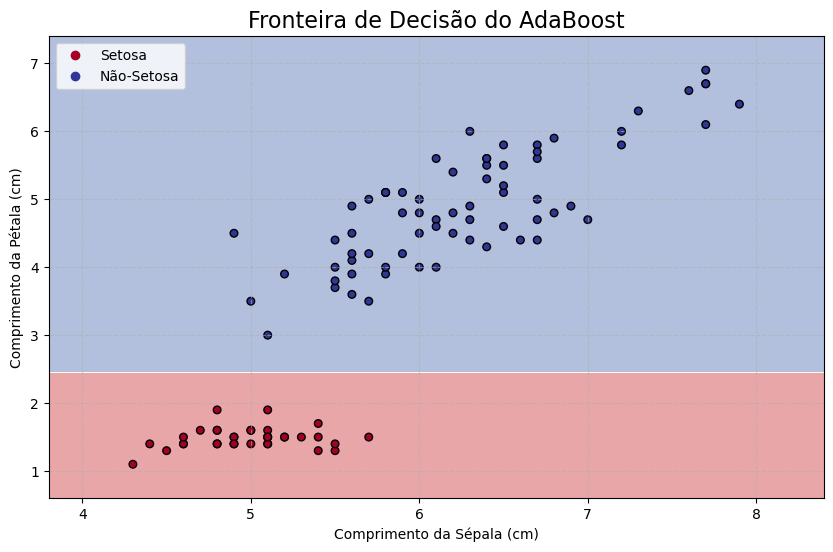

In [5]:
# Função para plotar a fronteira de decisão
def plot_decision_boundary(clf, X, y, title):
    plt.figure(figsize=(10, 6))
    
    # Define os limites do gráfico
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Cria uma grade de pontos para cobrir a área do gráfico
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Faz previsões para cada ponto na grade
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Desenha as áreas de decisão coloridas
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    
    # Plota os pontos de dados de treino
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', cmap=plt.cm.RdYlBu)
    
    plt.title(title, fontsize=16)
    plt.xlabel('Comprimento da Sépala (cm)')
    plt.ylabel('Comprimento da Pétala (cm)')
    plt.legend(handles=scatter.legend_elements()[0], labels=['Setosa', 'Não-Setosa'])
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Chamando a função para visualizar o resultado
plot_decision_boundary(ada_clf, X_train, y_train, "Fronteira de Decisão do AdaBoost")

 ### HYPERPARÂMETROS

1. estimator (ou base_estimator)
O que é: O modelo base (ou "aprendiz fraco") que será treinado sequencialmente.

Por que é importante: Define o bloco de construção do seu ensemble. Embora você possa usar vários tipos de modelos, o AdaBoost funciona melhor com modelos fracos, que são apenas um pouco melhores do que um palpite aleatório. O padrão e a escolha mais comum é uma árvore de decisão muito simples, com profundidade de 1 (DecisionTreeClassifier(max_depth=1)), também conhecida como decision stump. A escolha do estimador base impacta diretamente o viés e a variância do modelo final.

2. n_estimators
O que é: O número máximo de modelos fracos que serão treinados em sequência.

Por que é importante: Controla a complexidade do modelo.

Poucos estimadores: Pode levar a underfitting (o modelo é simples demais e não captura a complexidade dos dados).

Muitos estimadores: Pode levar a overfitting (o modelo se ajusta demais aos dados de treino e perde a capacidade de generalizar), além de aumentar o tempo de treinamento. O ideal é encontrar um equilíbrio, geralmente através de validação cruzada.

3. learning_rate (Taxa de Aprendizagem)
O que é: Um número (geralmente entre 0 e 1) que pondera a contribuição de cada modelo fraco no ensemble.

Por que é importante: Este é um hiperparâmetro de regularização crucial para evitar overfitting.

Valores altos (próximos a 1.0): Fazem o algoritmo corrigir os erros de forma mais agressiva, aprendendo mais rápido, mas com maior risco de superajuste.

Valores baixos (próximos a 0.01): Tornam o aprendizado mais lento e cauteloso, exigindo um n_estimators maior para atingir um bom desempenho, mas resultando em um modelo geralmente mais robusto e com melhor generalização. Existe um trade-off direto entre learning_rate e n_estimators.

4. algorithm
O que é: O algoritmo de boosting a ser utilizado. As opções são 'SAMME' e 'SAMME.R'.

Por que é importante: Afeta a velocidade de convergência e o desempenho.

'SAMME' (Stagewise Additive Modeling using a Multi-class Exponential loss function): Pode ser usado com qualquer classificador.

'SAMME.R' (R de "Real"): Utiliza as probabilidades de classe previstas pelo aprendiz fraco, em vez da classe prevista em si. Isso geralmente faz com que o modelo convirja muito mais rápido e alcance um erro de teste menor. É o padrão e quase sempre a melhor escolha, desde que o estimator base suporte o cálculo de probabilidades (o que o DecisionTreeClassifier faz).

5. random_state
O que é: A semente para o gerador de números aleatórios.

Por que é importante: Embora o AdaBoost seja um algoritmo determinístico em sua essência, o estimador base pode ter componentes aleatórios (por exemplo, a forma como uma árvore de decisão quebra empates ao escolher a melhor divisão). Definir um random_state garante que os resultados do seu modelo sejam exatamente os mesmos toda vez que você executar o código. Isso é fundamental para a reprodutibilidade de experimentos e para depurar o modelo de forma consistente.

In [8]:
# Importando as bibliotecas
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
# Carregando o dataset iris completo
iris = load_iris()
X, y = iris.data, iris.target

# Dividindo os dados em conjuntos de treino e teste
# Usamos stratify=y para manter a proporção das classes nos conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Dimensões dos dados de treino: {X_train.shape}")
print(f"Dimensões dos dados de teste: {X_test.shape}")

Dimensões dos dados de treino: (105, 4)
Dimensões dos dados de teste: (45, 4)


In [10]:
# 1. Definindo o modelo base e o classificador AdaBoost
# O estimador base (decision stump) será otimizado também (max_depth)
base_estimator = DecisionTreeClassifier()

ada_clf = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# 2. Definindo a grade de parâmetros para o teste
# O GridSearchCV irá testar todas as combinações possíveis.
# Para acessar o parâmetro do estimador base, usamos a sintaxe "estimator__<param_name>"
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'estimator__max_depth': [1, 2] # Otimizando a profundidade da árvore base
}

print("Modelo e grade de parâmetros definidos.")
print("Parâmetros a serem testados:")
print(param_grid)

Modelo e grade de parâmetros definidos.
Parâmetros a serem testados:
{'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5, 1.0], 'estimator__max_depth': [1, 2]}


In [13]:
%%time
# 3. Criando o objeto GridSearchCV
grid_search = GridSearchCV(
    estimator=ada_clf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2 # Mostra mais detalhes do processo
)

# 4. Executando a busca em grade com os dados de treino
print("Iniciando a busca pelos melhores hiperparâmetros...")
grid_search.fit(X_train, y_train)

print("\nBusca finalizada!")

Iniciando a busca pelos melhores hiperparâmetros...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Busca finalizada!
CPU times: total: 266 ms
Wall time: 3.85 s


C:\Users\thall\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [14]:
# 5. Exibindo os melhores resultados encontrados
print("--- Resultados do GridSearchCV ---")
print(f"Melhores parâmetros encontrados: {grid_search.best_params_}")
print(f"Melhor score (acurácia) na validação cruzada: {grid_search.best_score_:.4f}")

--- Resultados do GridSearchCV ---
Melhores parâmetros encontrados: {'estimator__max_depth': 1, 'learning_rate': 1.0, 'n_estimators': 100}
Melhor score (acurácia) na validação cruzada: 0.9619


In [15]:
# 6. Usando o melhor modelo encontrado para fazer previsões no conjunto de teste
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Calculando a acurácia final
accuracy_final = accuracy_score(y_test, y_pred_best)

print(f"\nAcurácia do melhor modelo no conjunto de teste: {accuracy_final:.4f}")


Acurácia do melhor modelo no conjunto de teste: 0.9111
